### Doc 
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader

In [2]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


In [3]:
#Model
model=ModelLoader()
model.set_model(MLPClassifier(max_iter=300,hidden_layer_sizes=(100,100,100),random_state=1))

#Optimization 122min Optimal params {'max_iter': 300, 'hidden_layer_sizes': (100, 100, 100)}

"""
param = {'hidden_layer_sizes': [(100,100,100), (100,100,100,100,100), (100,100,100,100,100,100,100,100,100,100)],
              'max_iter':[300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)


#Train model with optimal params
model.set_model(MLPClassifier())
"""


"\nparam = {'hidden_layer_sizes': [(100,100,100), (100,100,100,100,100), (100,100,100,100,100,100,100,100,100,100)],\n              'max_iter':[300,500,1000]}\ncv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)\n\nmodel.set_optimal_params(param)\n\nmodel.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)\n\n\n#Train model with optimal params\nmodel.set_model(MLPClassifier())\n"

Partial fit


Score accuracy group 0:  0.4192546583850932
Score accuracy global:  0.1432806324110672
Memory:  159.1421875 MB
Partial fit
Score accuracy group 1:  0.0
Score accuracy global:  0.191699604743083
Memory:  187.6182243441358 MB
Partial fit
Score accuracy group 2:  0.0
Score accuracy global:  0.12351778656126482
Memory:  193.91796875 MB
Partial fit
Score accuracy group 3:  0.0
Score accuracy global:  0.12549407114624506
Memory:  199.9375 MB
Partial fit
Score accuracy group 4:  0.0
Score accuracy global:  0.12648221343873517
Memory:  205.9921875 MB
Partial fit
Score accuracy group 5:  0.0
Score accuracy global:  0.1482213438735178
Memory:  211.875 MB
Partial fit
Score accuracy group 6:  0.2753623188405797
Score accuracy global:  0.17786561264822134
Memory:  217.77242353723403 MB
Average memory usage:  196.60792737591 MB


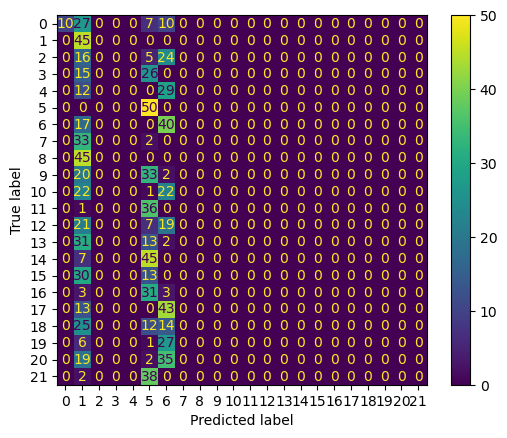

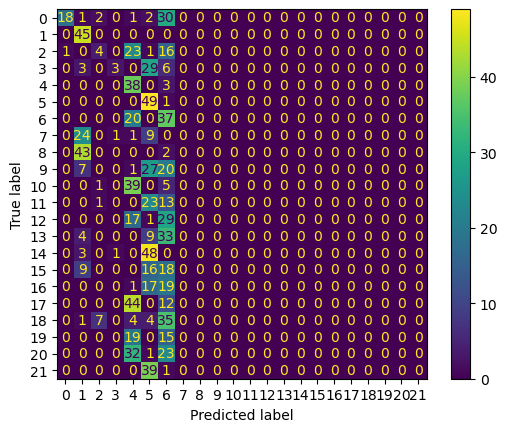

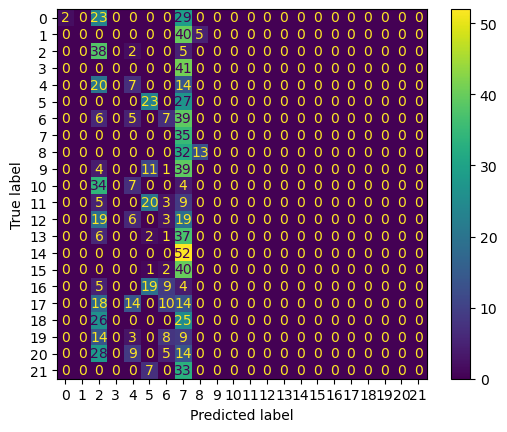

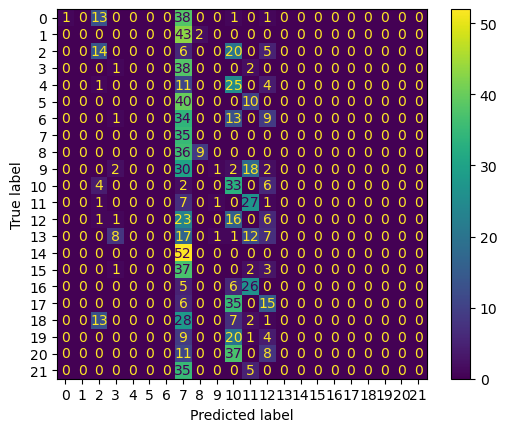

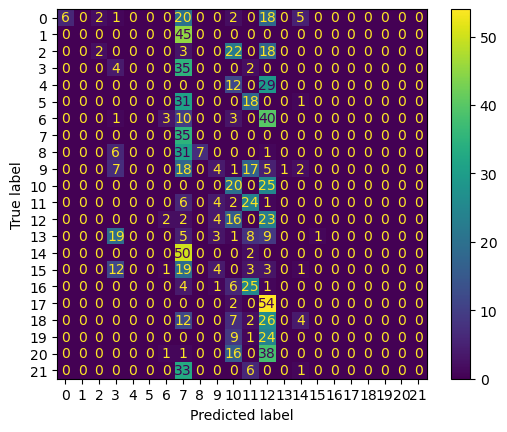

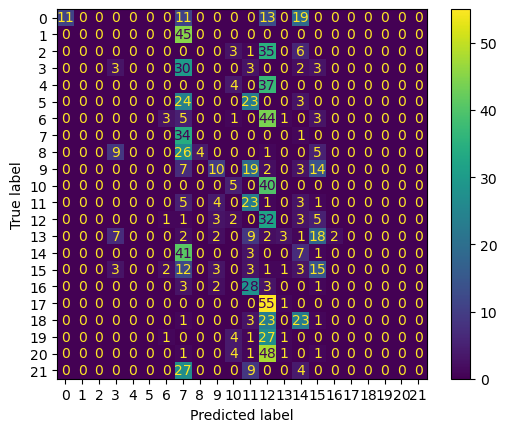

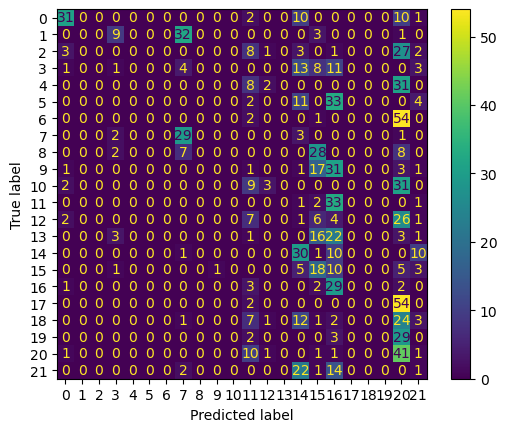

In [4]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7],2:[8,9],3:[10,11,12,13],4:[14,15,16],5:[17,18],6:[19],7:[20,21,22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group,random_state=1)
memory_values = []
dataset_merged=zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)
print(dataset_merged)
#Train model
for idx,(X_train,y_train,X_test,y_test) in enumerate(dataset_merged):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    print(f"Score accuracy group {idx}: ",model.score(X_test,y_test))

    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

Partial fit
Score accuracy batch:  0.2885375494071146
Score accuracy global:  0.30237154150197626
Memory:  243.52907986111111 MB
Partial fit
Score accuracy batch:  0.48221343873517786
Score accuracy global:  0.4772727272727273
Memory:  233.255859375 MB
Partial fit
Score accuracy batch:  0.549407114624506
Score accuracy global:  0.5563241106719368
Memory:  233.93671875 MB
Partial fit
Score accuracy batch:  0.567193675889328
Score accuracy global:  0.5602766798418972
Memory:  234.99739583333334 MB
Partial fit
Score accuracy batch:  0.5909090909090909
Score accuracy global:  0.5800395256916996
Memory:  235.42578125 MB
Partial fit
Score accuracy batch:  0.6086956521739131
Score accuracy global:  0.5978260869565217
Memory:  236.97352430555554 MB
Partial fit
Score accuracy batch:  0.6027667984189723
Score accuracy global:  0.616600790513834
Memory:  238.58203125 MB
Partial fit
Score accuracy batch:  0.6245059288537549
Score accuracy global:  0.6146245059288538
Memory:  240.63237847222223 MB


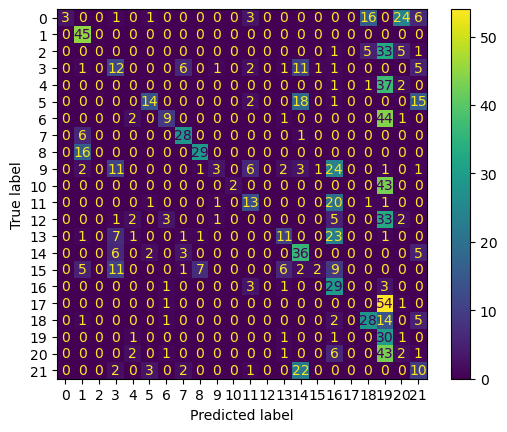

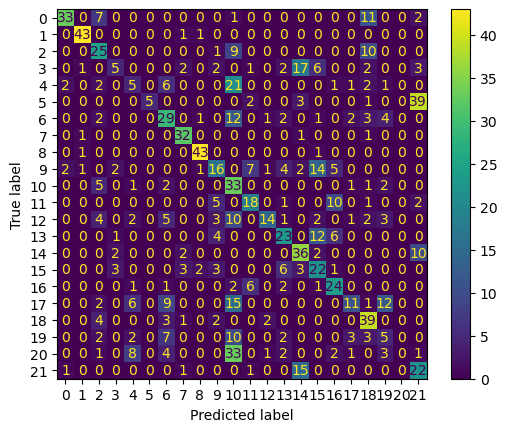

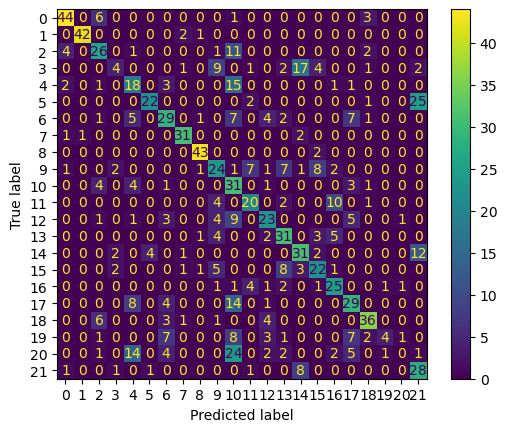

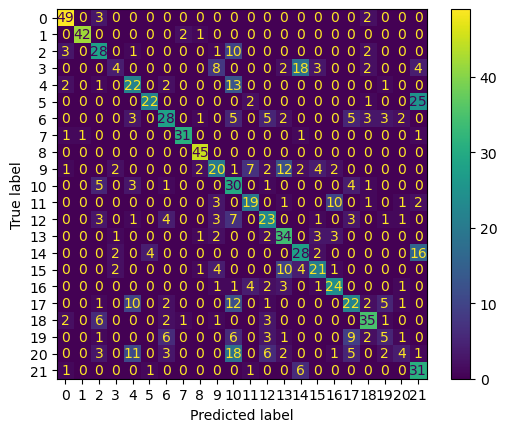

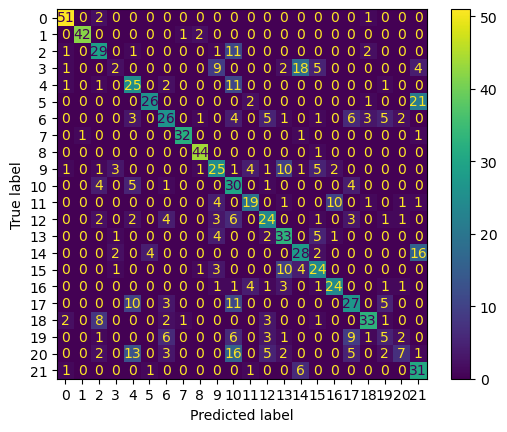

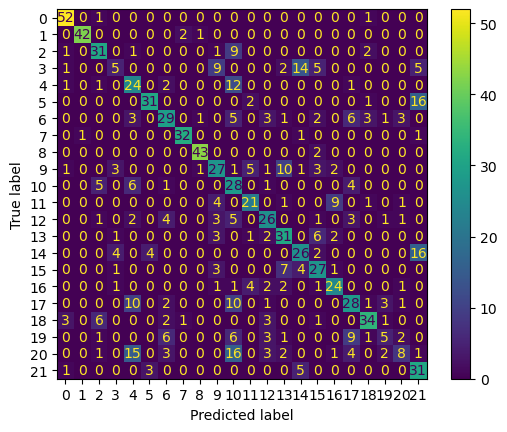

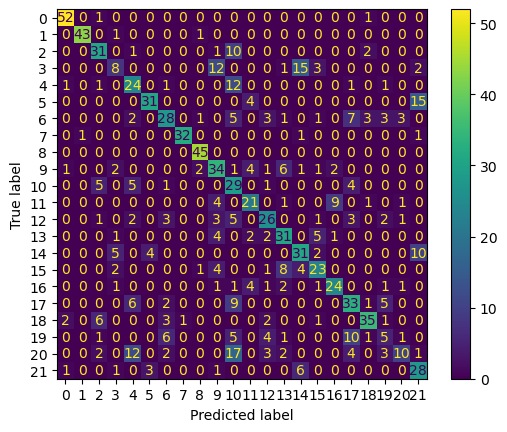

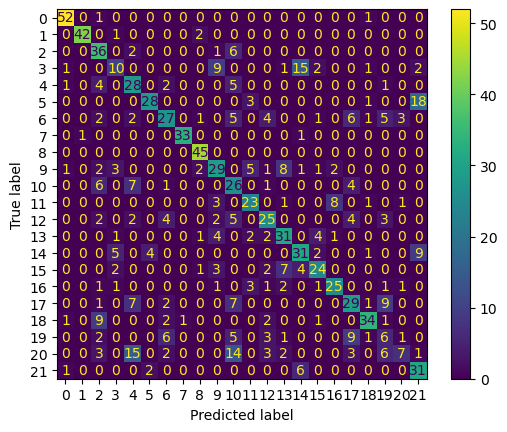

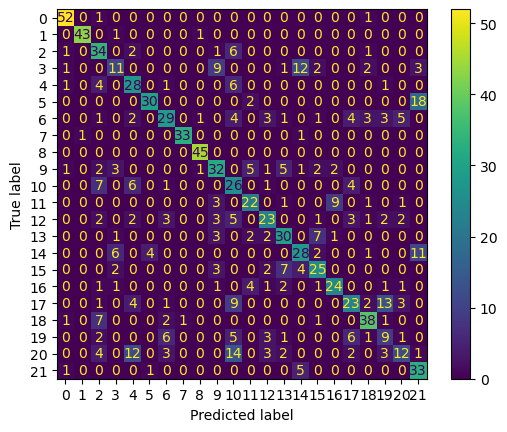

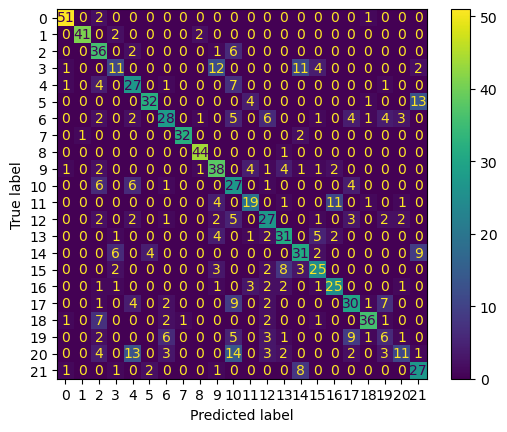

In [5]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10,random_state=1)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print("Score accuracy batch: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")